In [2]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# baca data dari file CSV
data = pd.read_csv('data/insurance.csv')

# melihat data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# identifikasi variabel
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


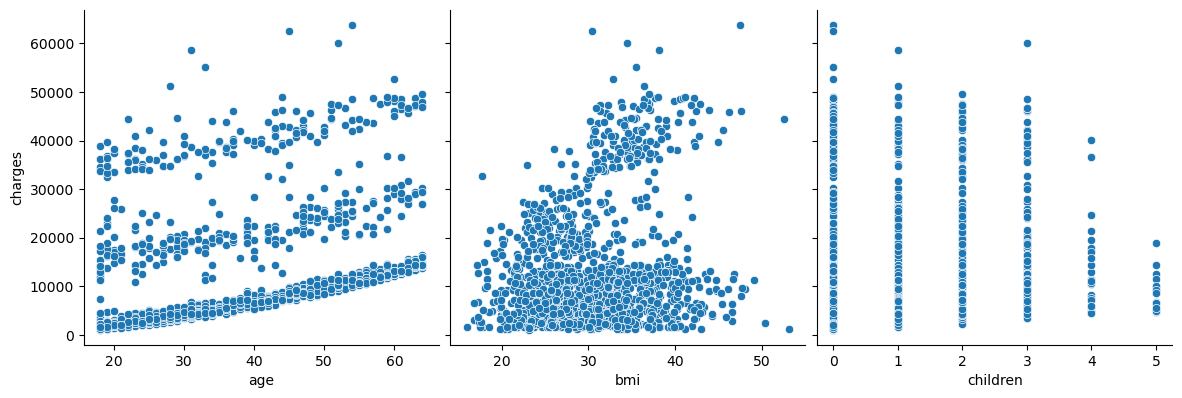

In [5]:
sns.pairplot(data, x_vars=['age', 'bmi','children'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

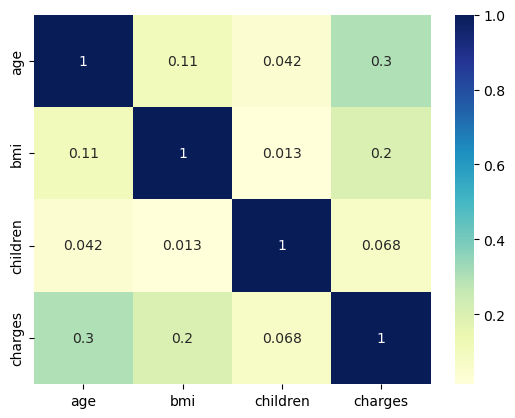

In [6]:
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [7]:
# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
X = data[['age', 'bmi', 'children']]
y = data['charges'] / 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [8]:
# Lakukan feature scaling jika diperlukan.
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)

X_test_scaled = std.transform(X_test)

In [9]:
# Buat model multiple linear regression menggunakan Scikit-Learn.
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train_scaled, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test_scaled)

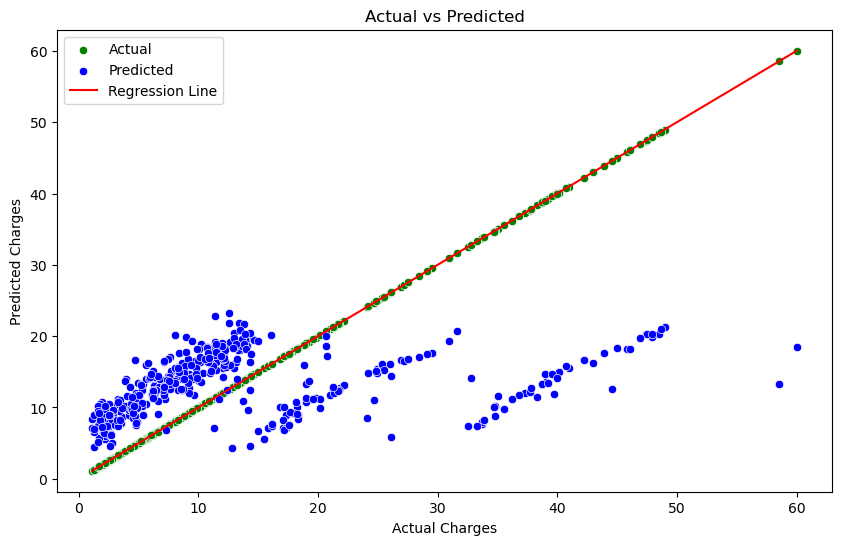

R-squared: 0.11011288902870364
Mean Squared Error (MSE): 129.20955277458597
Mean Absolute Error (MAE): 8.899594165897632


In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Menampilkan hasil prediksi dan nilai target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test, color='green', label='Actual')
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")